In [138]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

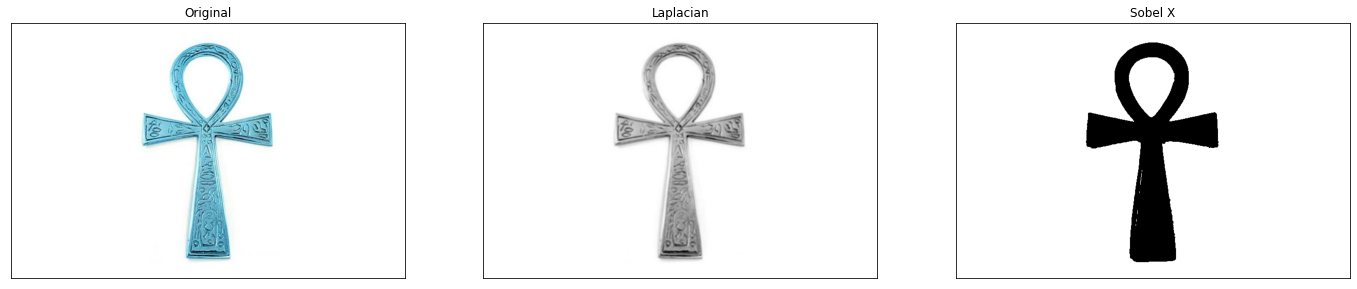

In [139]:
im = cv2.imread('ank.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,245,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [118]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)


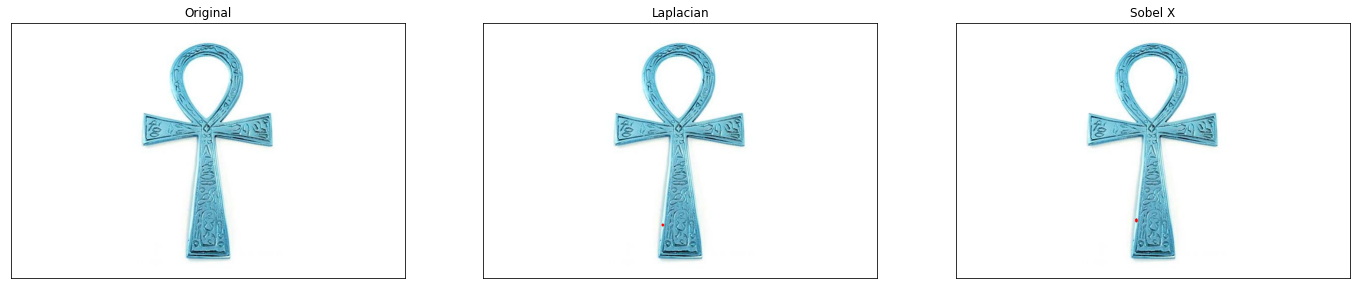

In [119]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [136]:
print(contours)

(array([[[  0,   0]],

       [[  0, 499]],

       [[769, 499]],

       [[769,   0]]], dtype=int32), array([[[374,  40]],

       [[375,  39]],

       [[394,  39]],

       ...,

       [[365,  41]],

       [[368,  41]],

       [[369,  40]]], dtype=int32), array([[[351, 395]],

       [[351, 397]]], dtype=int32), array([[[352, 385]],

       [[352, 389]]], dtype=int32), array([[[354, 368]],

       [[354, 374]]], dtype=int32), array([[[358, 331]],

       [[358, 333]]], dtype=int32), array([[[362, 295]],

       [[362, 302]],

       [[361, 303]],

       [[361, 309]],

       [[360, 310]],

       [[360, 317]],

       [[360, 311]],

       [[361, 310]],

       [[361, 303]],

       [[362, 302]]], dtype=int32), array([[[363, 289]],

       [[363, 292]]], dtype=int32), array([[[374,  69]],

       [[373,  70]],

       [[369,  70]],

       [[368,  71]],

       [[366,  71]],

       [[365,  72]],

       [[363,  72]],

       [[362,  73]],

       [[360,  73]],

       [[358,  7

In [137]:
print(im(contours))

TypeError: 'numpy.ndarray' object is not callable

In [126]:
print(size)

NameError: name 'size' is not defined

In [127]:
cnt = contours[2]
M=cv2.moments(cnt)
print(M)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [132]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)



ZeroDivisionError: float division by zero

In [129]:
print(approx )

[[[390 471]]

 [[391 470]]

 [[392 471]]

 [[391 472]]]


In [131]:
print(area,perimeter)

2.0 5.656854152679443


In [133]:
img0 = cv2.rectangle(img0,(cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
img0 = cv2.drawContours(img1, approx, 0, (255,0,0),3)

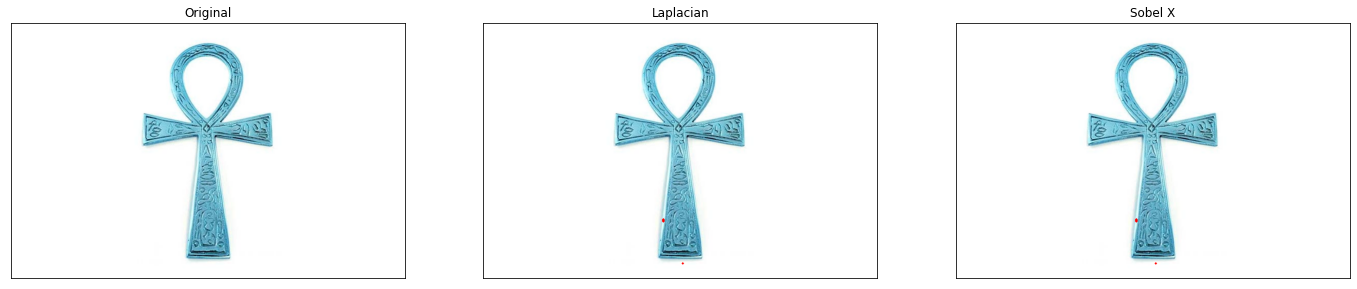

In [134]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()